In [1]:
from plots.mpltoolkit import load_style_sheet, mpl_loc, named_colors, fancy_legend, markers
import matplotlib.pyplot as plt
import numpy as np
from databanks.SDSS import IPL3_GIANTS
import sys
load_style_sheet("papers")
print(sys.version_info)

sys.version_info(major=3, minor=12, micro=0, releaselevel='final', serial=0)


In [2]:
print(IPL3_GIANTS)

{'sdss_id': array([1.16010946e+08, 1.15031735e+08, 1.14941357e+08, ...,
       1.15028161e+08, 1.14948039e+08, 1.16051329e+08]), 'gaia_dr3_source_id': array([2.16648634e+17, 6.40979244e+16, 3.70828207e+16, ...,
       6.32582368e+16, 3.97278333e+16, 2.23988493e+17]), 'l': array([160.822, 168.545, 176.472, ..., 169.321, 174.591, 156.508]), 'b': array([-17.7543, -23.6931, -30.6566, ..., -25.6177, -30.3017, -11.8159]), 'r_med_geo': array([5022.8  , 2018.71 ,  698.491, ..., 1295.64 , 1029.89 , 2083.25 ]), 'snr': array([  99.444, 1151.97 ,  635.974, ...,  227.395,  374.693,  245.168]), 'teff': array([4819.8 , 4032.  , 4721.9 , ..., 4643.1 , 4832.9 , 4959.62]), 'e_teff': array([23.2763, 10.2288, 11.6993, ..., 13.3725, 13.0184, 16.3563]), 'logg': array([2.3694 , 1.21466, 2.3951 , ..., 2.4237 , 2.3895 , 2.7576 ]), 'e_logg': array([0.060035 , 0.0197768, 0.0219928, ..., 0.0286778, 0.0264236,
       0.030681 ]), 'al_h': array([-0.242682 , -0.365312 ,  0.0335684, ...,  0.109328 , -0.0592726,
     

In [3]:
raw = []
with open("./SolarAnalogsXFeBirthRadii.csv", 'r') as f:
    while True:
        line = f.readline()[:-1]
        if line == "":
            break
        elif line[0] == "#":
            labels = line[1:].split(',')
        else:
            line = line.split(',')
            star = []
            for i in range(len(labels)):
                if i == 0 or i == len(labels) - 1:
                    star.append(line[i])
                elif line[i] == "":
                    star.append(float("nan"))
                else:
                    star.append(float(line[i]))
            raw.append(star)
    f.close()
sample = dict()
for i in range(len(labels)):
    sample[labels[i]] = np.array([row[i] for row in raw])

In [4]:
print(sample)
print(list(set(sample["prov"])))
print(len(sample["Fe_h"]))

{' ID': array(['77161217776670208', '6481828582855724544', '1814241194252808704',
       ..., 'KOI-3167', 'KOI-3009', 'KOI-439'], dtype='<U19'), 'teff': array([5719., 5906., 5853., ..., 5491., 5031., 5342.]), 'logg': array([4.485, 4.5  , 4.48 , ..., 4.56 , 4.5  , 4.32 ]), 'age': array([3.2, 1.2, 2.4, ..., nan, nan, nan]), 'slope': array([ 9.84123327e-05,  5.36923990e-05,  1.43551345e-04, ...,
        2.18365581e-04, -5.07163352e-05, -2.14165559e-04]), 'br_mc': array([ 7.2217834 , 11.43368415,  5.50557486, ...,  8.66107351,
        7.40609241,  5.10623757]), 'Fe_h': array([-0.028,  0.088, -0.08 , ..., -0.06 ,  0.17 ,  0.27 ]), 'Mg_fe': array([ 0.022, -0.114,  0.082, ..., -0.05 , -0.08 , -0.04 ]), 'Na_fe': array([-0.023, -0.181,  0.009, ..., -0.13 ,  0.   ,  0.1  ]), 'Mn_fe': array([-0.001, -0.134,  0.017, ..., -0.1  ,  0.01 ,  0.04 ]), 'Cr_fe': array([ 0.041, -0.09 ,  0.072, ...,  0.02 , -0.02 ,  0.   ]), 'Ni_fe': array([-0.013, -0.126,  0.042, ..., -0.1  , -0.09 , -0.02 ]), 'V_fe': arr

In [5]:
print(sample["Fe_h"])
print(sample["Mg_fe"])
print(len(sample["Fe_h"]))
print(len(sample["Mg_fe"]))

[-0.028  0.088 -0.08  ... -0.06   0.17   0.27 ]
[ 0.022 -0.114  0.082 ... -0.05  -0.08  -0.04 ]
18227
18227


In [6]:
print(min(sample["Fe_h"]))
print(max(sample["Fe_h"]))
print(np.std(sample["Fe_h"]))

-0.30942630767822266
0.3119373321533203
0.10928826349624796


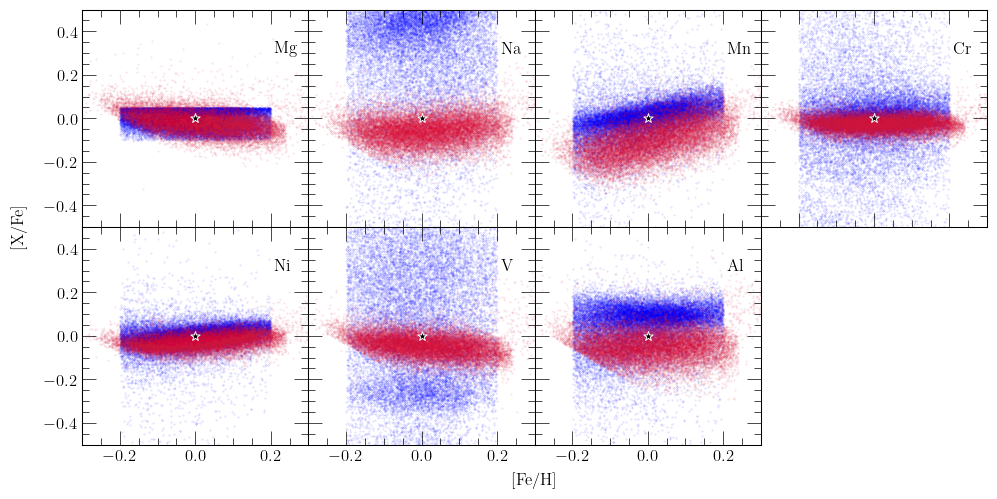

In [44]:
ELEMENTS = ["Mg", "Na", "Mn", "Cr", "Ni", "V", "Al"]

fig = plt.figure(figsize = (10, 5))
axes = []
for i in range(7):
    kwargs = {}
    if i:
        kwargs["sharex"] = axes[0]
        kwargs["sharey"] = axes[0]
    else: pass
    axes.append(fig.add_subplot(241 + i, **kwargs))
    if i % 4: plt.setp(axes[i].get_yticklabels(), visible = False)
    if i < 4: plt.setp(axes[i].get_xticklabels(), visible = False)
    axes[i].set_xlim([-0.3, 0.3])
    axes[i].set_ylim([-0.5, 0.5])
    axes[i].text(0.21, 0.3, ELEMENTS[i].capitalize(), fontsize = 12)

indices = []
for i in range(len(IPL3_GIANTS["r_med_geo"])):
    if (IPL3_GIANTS["r_med_geo"][i] <= 1000 and 
        abs(IPL3_GIANTS["fe_h"][i]) <= 0.2 and
        -0.1 <= IPL3_GIANTS["mg_h"][i] - IPL3_GIANTS["fe_h"][i] <= 0.05): indices.append(i)

for i in range(len(axes)):
    kwargs = {
        "c": named_colors()["blue"],
        "s": 0.1,
        "rasterized": True,
        "alpha": 0.2
    }
    feh = [IPL3_GIANTS["fe_h"][idx] for idx in indices]
    xh = [IPL3_GIANTS["%s_h" % (ELEMENTS[i].lower())][idx] for idx in indices]
    xfe = [a - b for a, b in zip(xh, feh)]
    axes[i].scatter(feh, xfe, **kwargs)
    kwargs["c"] = named_colors()["crimson"]
    axes[i].scatter(sample["Fe_h"], sample["%s_fe" % (ELEMENTS[i].capitalize())], **kwargs)
    axes[i].scatter(0, 0, s = 50,
        marker = markers()["star"],
        c = named_colors()["black"],
        edgecolors = named_colors()["white"],
        linewidth = 0.7)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0, left = 0.08, bottom = 0.1)
background = fig.add_subplot(111, xticks = [], yticks = [], zorder = -1000)
background.set_xlabel("[Fe/H]", labelpad = 20)
background.set_ylabel("[X/Fe]", labelpad = 40)
background.spines["right"].set_visible(False)
background.spines["bottom"].set_visible(False)
plt.savefig("./ipl3-solar-neighborhood-comparison.pdf")
plt.show()